In [2]:
# Comments Analysis 

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw')


df = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Recent_User_Comment_Network.csv")

gaming_abbreviations = set(pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\Abbrivations_COD.csv")['Abbrivations'])

def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove gaming-specific abbreviations
    tokens = [token for token in tokens if token not in gaming_abbreviations]
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

gaming_keywords = set(pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\Keywords_COD.csv")['Keywords'])
gaming_phrases = list(pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\Phrases_COD.csv")['Phrases'])

def get_sentiment_score(comment):
    # Preprocess the comment
    comment = preprocess(comment)
    # Create an instance of SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    # Calculate the sentiment score of the comment
    sentiment_score = 0
    num_phrases = 0
    for phrase in gaming_phrases:
        if phrase in comment:
            sentiment_score += 0
            num_phrases += 1
            comment = comment.replace(phrase, '')
    tokens = word_tokenize(comment)
    if not tokens and num_phrases == 0:
        return 0
    for token in tokens:
        if token in gaming_keywords:
            sentiment_score += 0
        else:
            sentiment_score += sia.polarity_scores(token)['compound']
    sentiment_score /= (len(tokens) + num_phrases)
    return sentiment_score

def get_sentiment_class(score):
    if score > 0:
        return 1
    elif score < -0:
        return -1
    else:
        return 0


df['Rec_Comm_sentiment_score'] = df['Comments'].apply(get_sentiment_score)
df['Rec_Comment_sc'] = df['Rec_Comm_sentiment_score'].apply(get_sentiment_class)

df.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Recent_User_Comment_Network.csv", index=False)


[nltk_data] Downloading package punkt to C:\Users\Pranav
[nltk_data]     SA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pranav
[nltk_data]     SA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to C:\Users\Pranav
[nltk_data]     SA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


## Finding every post user's Sentiment Score from recent comments

In [3]:
# Group the DataFrame by the User column
grouped = df.groupby('User')

# Calculate the average sentiment score for each user
user_sentiment = grouped['Rec_Comm_sentiment_score'].sum()

# Convert the result to a DataFrame
user_sentiment_df = user_sentiment.reset_index()


In [4]:
# Save the DataFrame to a CSV file
user_sentiment_df.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Post_user_sentiment.csv", index=False)


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Reddit_DA_NETWORK.csv")

# Group the data by comment_author and calculate the sum of sentiment_score for each author
sentiment_scores = df.groupby('comment_author')['comment_sentiment'].sum()

# Save the sentiment scores to a new CSV file
sentiment_scores.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\All_redditor_commenter_SC.csv", header=True)



In [9]:
import pandas as pd

# Load the sentiment scores from the 'sentiment_scores.csv' file
sentiment_scores = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\All_redditor_commenter_SC.csv", index_col=0, squeeze=True)

# Load the data from the 'Post_user_sentiment.csv' file
post_user_sentiment = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Post_user_sentiment.csv")

# Group the data by comment_author and calculate the sum of sentiment_score for each author
new_sentiment_scores = post_user_sentiment.groupby('User')['Rec_Comm_sentiment_score'].sum()

# Update the sentiment scores with the new data
sentiment_scores.update(new_sentiment_scores)

# Add any new comment authors to the sentiment scores
sentiment_scores = sentiment_scores.append(new_sentiment_scores[~new_sentiment_scores.index.isin(sentiment_scores.index)])

# Reset the index to create a DataFrame with two columns: 'Users' and 'Sentiment_Score'
sentiment_scores = sentiment_scores.reset_index()
sentiment_scores.columns = ['Users', 'Sentiment_Score']

# Save the updated sentiment scores to the 'sentiment_scores.csv' file
sentiment_scores.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\All_redditor_commenter_SC.csv", header=True)

print('Sentiment scores updated and saved to sentiment_scores.csv')


Sentiment scores updated and saved to sentiment_scores.csv


C:\temp\ipykernel_23756\4261015779.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sentiment_scores = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\All_redditor_commenter_SC.csv", index_col=0, squeeze=True)
C:\temp\ipykernel_23756\4261015779.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_scores = sentiment_scores.append(new_sentiment_scores[~new_sentiment_scores.index.isin(sentiment_scores.index)])


In [10]:
#######################################################

In [1]:
import pandas as pd

def calculate_sentiment_score(data):
  # Create a new DataFrame to store the sentiment scores and edges.
  edges = pd.DataFrame(columns=['Source', 'Target', 'Weight', 'Sentiment'])

  # Create a list to store the (source, target) tuples
  existing_edges = []

  # Iterate over the DataFrame.
  for index, row in data.iterrows():
    source = row['post_redditor'] if row['parent_id'] == row['post_id'] else row['comment_author']
    target = row['comment_author']
    weight = 1
    sentiment = 0

    # Calculate the sentiment score for the comment.
    sentiment += row['sentiment_score'] + row['Post_sentiment_score']

    # Convert the (source, target) tuple to a hashable type
    edge_tuple = (source, target)

    # Check if an edge already exists in either direction
    if edge_tuple in existing_edges or (target, source) in existing_edges:
      # Increment the weight of the existing edge
      edges.loc[(edges['Source'] == source) & (edges['Target'] == target), 'Weight'] += 1
      # Update the sentiment score of the existing edge
      edges.loc[(edges['Source'] == source) & (edges['Target'] == target), 'Sentiment'] += sentiment
    else:
      # Add the new edge to the list of existing edges
      existing_edges.append(edge_tuple)
      # Add a new row to the edges DataFrame
      edges.loc[index] = [source, target, weight, sentiment]

  # Remove self-edges from the edges DataFrame
  edges = edges[edges['Source'] != edges['Target']]

  # Return the DataFrame of edges.
  return edges

if __name__ == '__main__':
  # Read the data from the CSV file.
  data = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Reddit_DA_NETWORK.csv")

  # Calculate the sentiment score and create the edges.
  edges = calculate_sentiment_score(data)
  # Save the edges DataFrame to a CSV file
  edges.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\edges_test.csv", index=False)

  # Print the edges.
  print(edges)
    

D:\1.UK\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\1.UK\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\1.UK\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


           Source             Target  Weight  Sentiment
0     Onetimeguy8   Glockodile_Dun-D       1  -0.095450
1     Onetimeguy8   Swamp_Donkey_796       1   0.023257
2     Onetimeguy8      BlackBeard205       1   0.000000
3     Onetimeguy8       ThasKindaGay       1  -0.126856
4     Onetimeguy8           Rekkenze       1   0.000000
...           ...                ...     ...        ...
5233    Cyrax_312  GingerBeardicus86       1   0.011288
5234    Cyrax_312           Rizzaboi       1  -0.324300
5235    Cyrax_312    BeatMasterFresh       1   0.018129
5236    Cyrax_312       QuinSanguine       1  -0.009279
5237    Cyrax_312            TPMatus       1  -0.226933

[2400 rows x 4 columns]


In [2]:
import networkx as nx

# Create a new directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], sentiment=row['Sentiment'])

# Calculate the degree centrality of the nodes
degree_centrality = nx.degree_centrality(G)

# Add a new column to the edges DataFrame to store the degree centrality of the source nodes
edges['SourceDegreeCentrality'] = edges['Source'].map(degree_centrality)

# Save the updated edges DataFrame to a CSV file
edges.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\edges_test.csv", index=False)

# Print the updated edges DataFrame
print(edges)


           Source             Target  Weight  Sentiment  \
0     Onetimeguy8   Glockodile_Dun-D       1  -0.095450   
1     Onetimeguy8   Swamp_Donkey_796       1   0.023257   
2     Onetimeguy8      BlackBeard205       1   0.000000   
3     Onetimeguy8       ThasKindaGay       1  -0.126856   
4     Onetimeguy8           Rekkenze       1   0.000000   
...           ...                ...     ...        ...   
5233    Cyrax_312  GingerBeardicus86       1   0.011288   
5234    Cyrax_312           Rizzaboi       1  -0.324300   
5235    Cyrax_312    BeatMasterFresh       1   0.018129   
5236    Cyrax_312       QuinSanguine       1  -0.009279   
5237    Cyrax_312            TPMatus       1  -0.226933   

      SourceDegreeCentrality  
0                   0.028033  
1                   0.028033  
2                   0.028033  
3                   0.028033  
4                   0.028033  
...                      ...  
5233                0.011029  
5234                0.011029  
5235        

In [4]:
import networkx as nx

# Create a new directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], sentiment=row['Sentiment'])

# Calculate network-level descriptive statistics
average_degree = sum(dict(G.degree()).values()) / float(G.number_of_nodes())
density = nx.density(G)

# Find the largest weakly connected component of the graph
largest_wcc = max(nx.weakly_connected_components(G), key=len)

# Create a subgraph containing only the nodes in the largest weakly connected component
G_wcc = G.subgraph(largest_wcc)

# Calculate the average path length for the largest weakly connected component
average_path_length_wcc = nx.average_shortest_path_length(G_wcc)

# Print the results
print(f'Average degree: {average_degree}')
print(f'Density: {density}')
print(f'Average path length (largest weakly connected component): {average_path_length_wcc}')


Average degree: 2.2048690858980247
Density: 0.0005066335215758329
Average path length (largest weakly connected component): 0.0007095480487428659


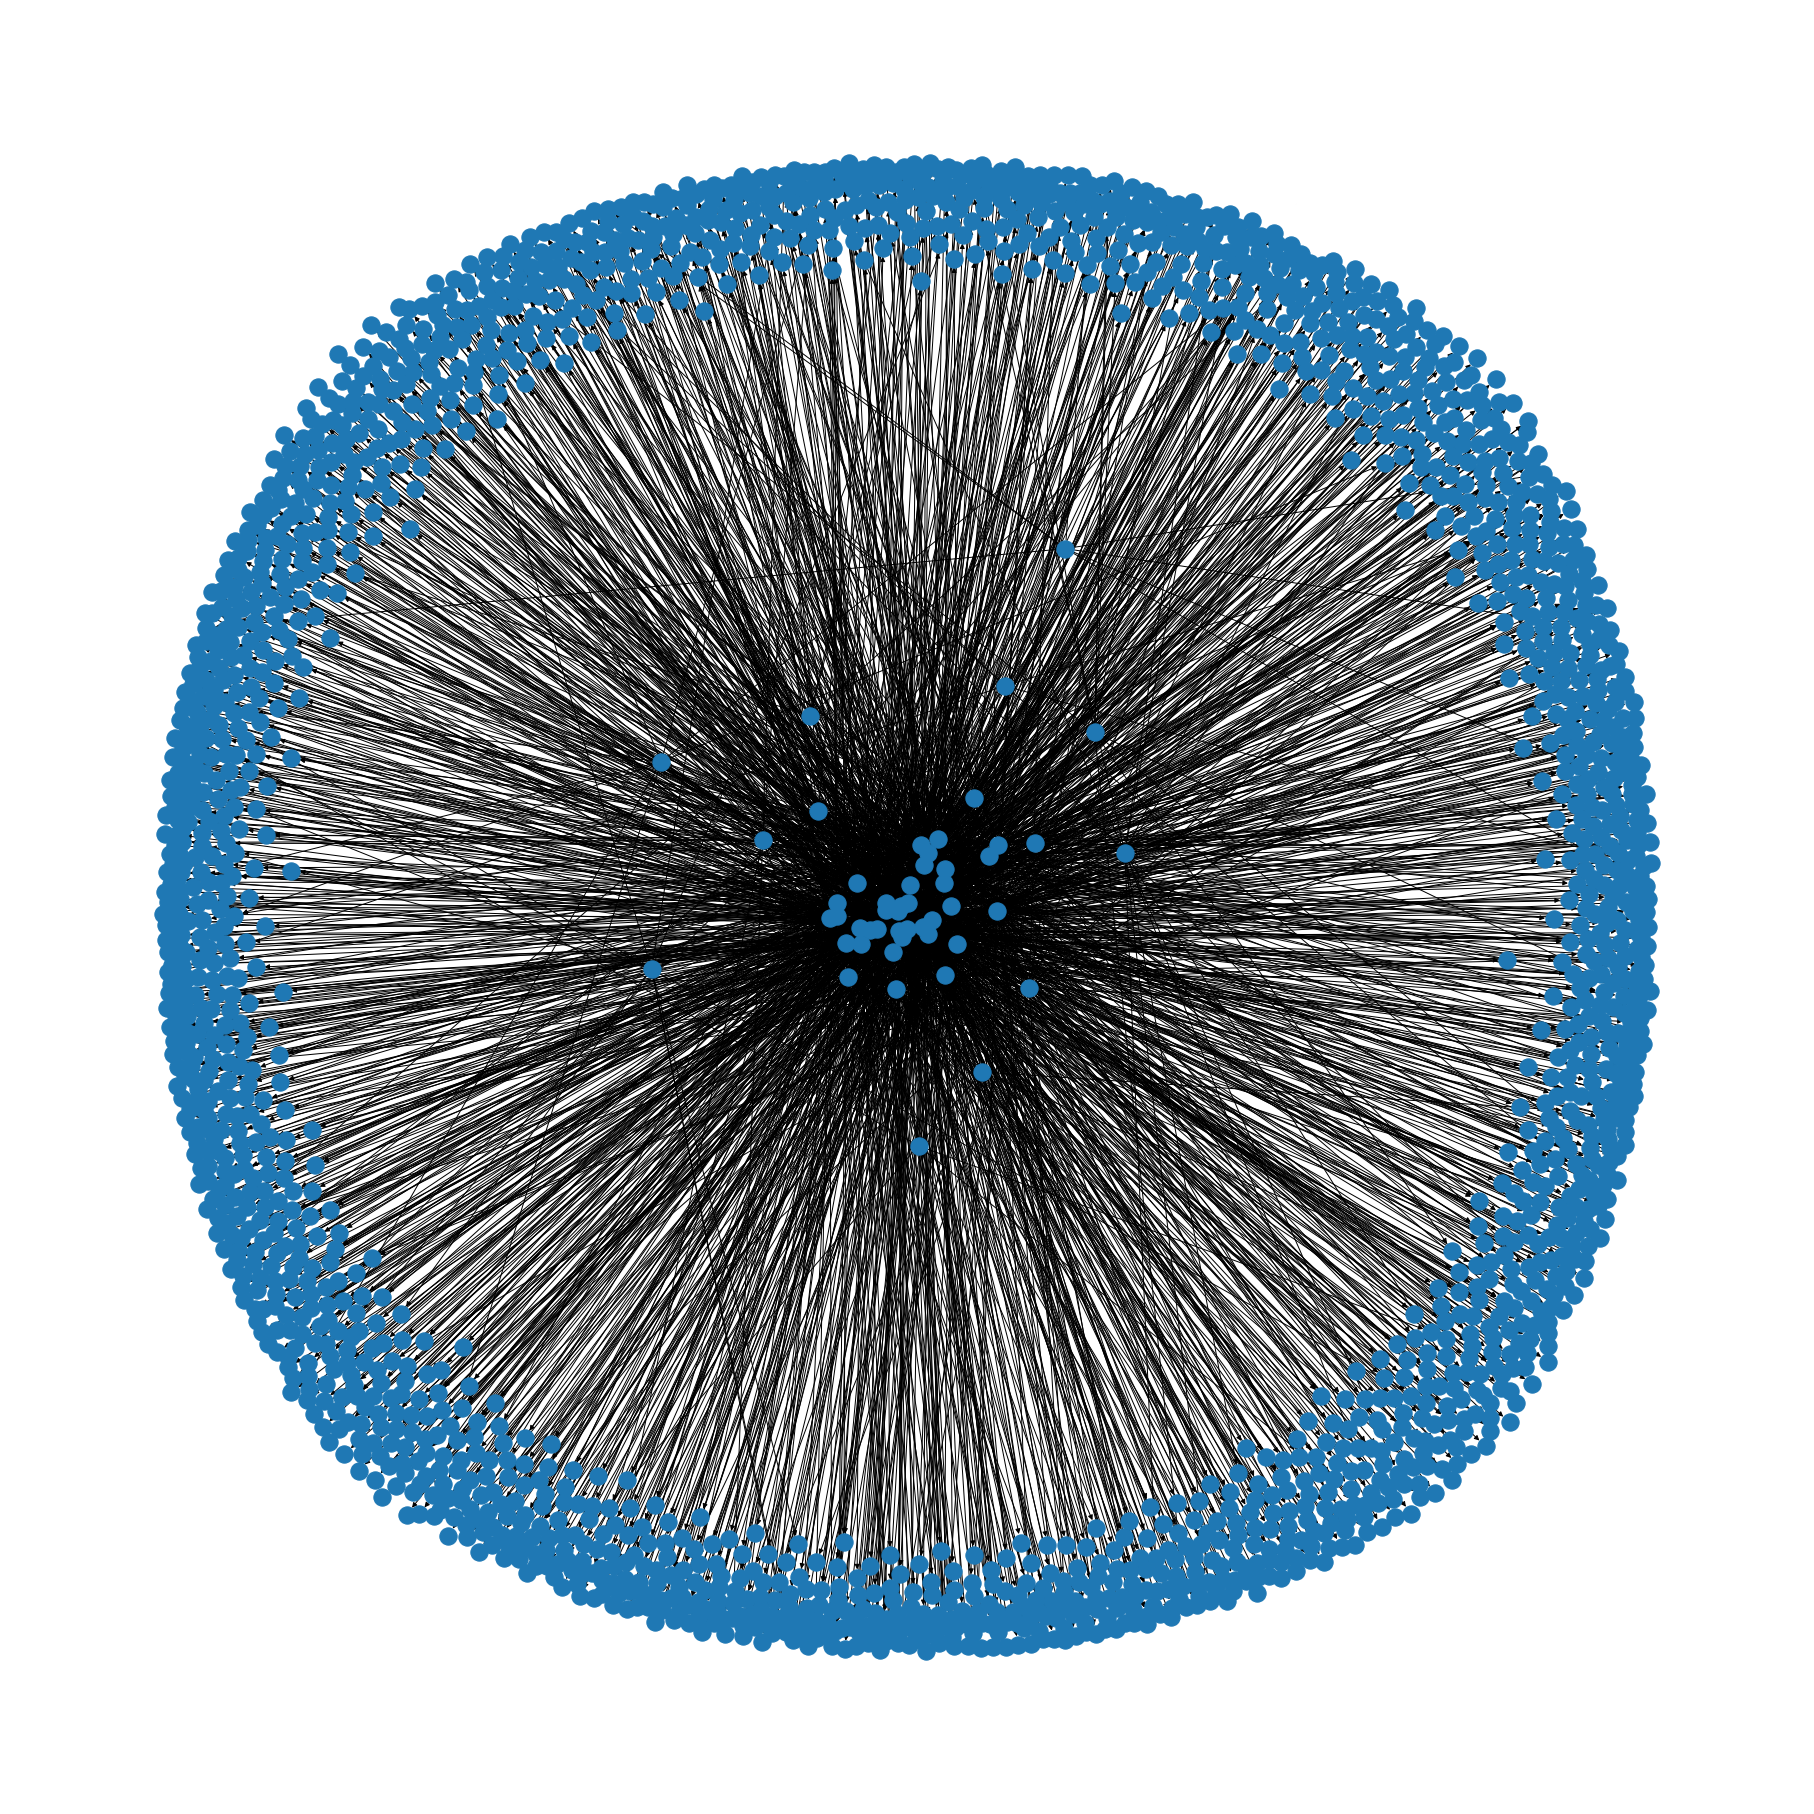

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'], sentiment=row['Sentiment'])

# Filter the edges to only include those with a weight greater than 1
edges_to_keep = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > 0]
H = G.edge_subgraph(edges_to_keep)

# Create a Figure object with a larger size
fig = plt.figure(figsize=(25, 25))

# Draw the filtered graph
nx.draw(H)

plt.show()


# Test Relation network

In [18]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Test_Network.csv")

# Create an undirected graph object
G = nx.Graph()

# Add nodes for each unique user in the data
for i, row in df.iterrows():
    G.add_node(row['post_redditor'])
    G.add_node(row['comment_author'])

# Add edges between users who are connected, with weights representing the number of interactions
for i, row in df.iterrows():
    if row['depth'] == 0:
        # Comment author replied to post
        if G.has_edge(row['post_redditor'], row['comment_author']):
            # Increase the weight of the edge by 1
            G[row['post_redditor']][row['comment_author']]['weight'] += 1
        else:
            # Add a new edge with weight 1
            G.add_edge(row['post_redditor'], row['comment_author'], weight=1)
    else:
        # Comment author replied to another comment
        parent_comment = df.loc[df['comment_id'] == row['parent_id']]
        if not parent_comment.empty:
            if G.has_edge(parent_comment.iloc[0]['comment_author'], row['comment_author']):
                # Increase the weight of the edge by 1
                G[parent_comment.iloc[0]['comment_author']][row['comment_author']]['weight'] += 1
            else:
                # Add a new edge with weight 1
                G.add_edge(parent_comment.iloc[0]['comment_author'], row['comment_author'], weight=1)

# Create a figure with a specific size (in inches)
plt.figure(figsize=(30, 30))

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()


In [22]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Reddit_DA_NETWORK.csv")

# Create an undirected graph object
G = nx.Graph()

# Add nodes for each unique user in the data
for i, row in df.iterrows():
    G.add_node(row['post_redditor'])
    G.add_node(row['comment_author'])

# Add edges between users who are connected, with weights representing the number of interactions
for i, row in df.iterrows():
    if row['depth'] == 0:
        # Comment author replied to post
        if G.has_edge(row['post_redditor'], row['comment_author']):
            # Increase the weight of the edge by 1
            G[row['post_redditor']][row['comment_author']]['weight'] += 1
        else:
            # Add a new edge with weight 1
            G.add_edge(row['post_redditor'], row['comment_author'], weight=1)
    else:
        # Comment author replied to another comment
        parent_comment = df.loc[df['comment_id'] == row['parent_id']]
        if not parent_comment.empty:
            if G.has_edge(parent_comment.iloc[0]['comment_author'], row['comment_author']):
                # Increase the weight of the edge by 1
                G[parent_comment.iloc[0]['comment_author']][row['comment_author']]['weight'] += 1
            else:
                # Add a new edge with weight 1
                G.add_edge(parent_comment.iloc[0]['comment_author'], row['comment_author'], weight=1)

# Create a figure with a specific size (in inches)
plt.figure(figsize=(30, 30))

# Draw the graph
nx.draw(G, with_labels=False)

# Show the plot
plt.show()


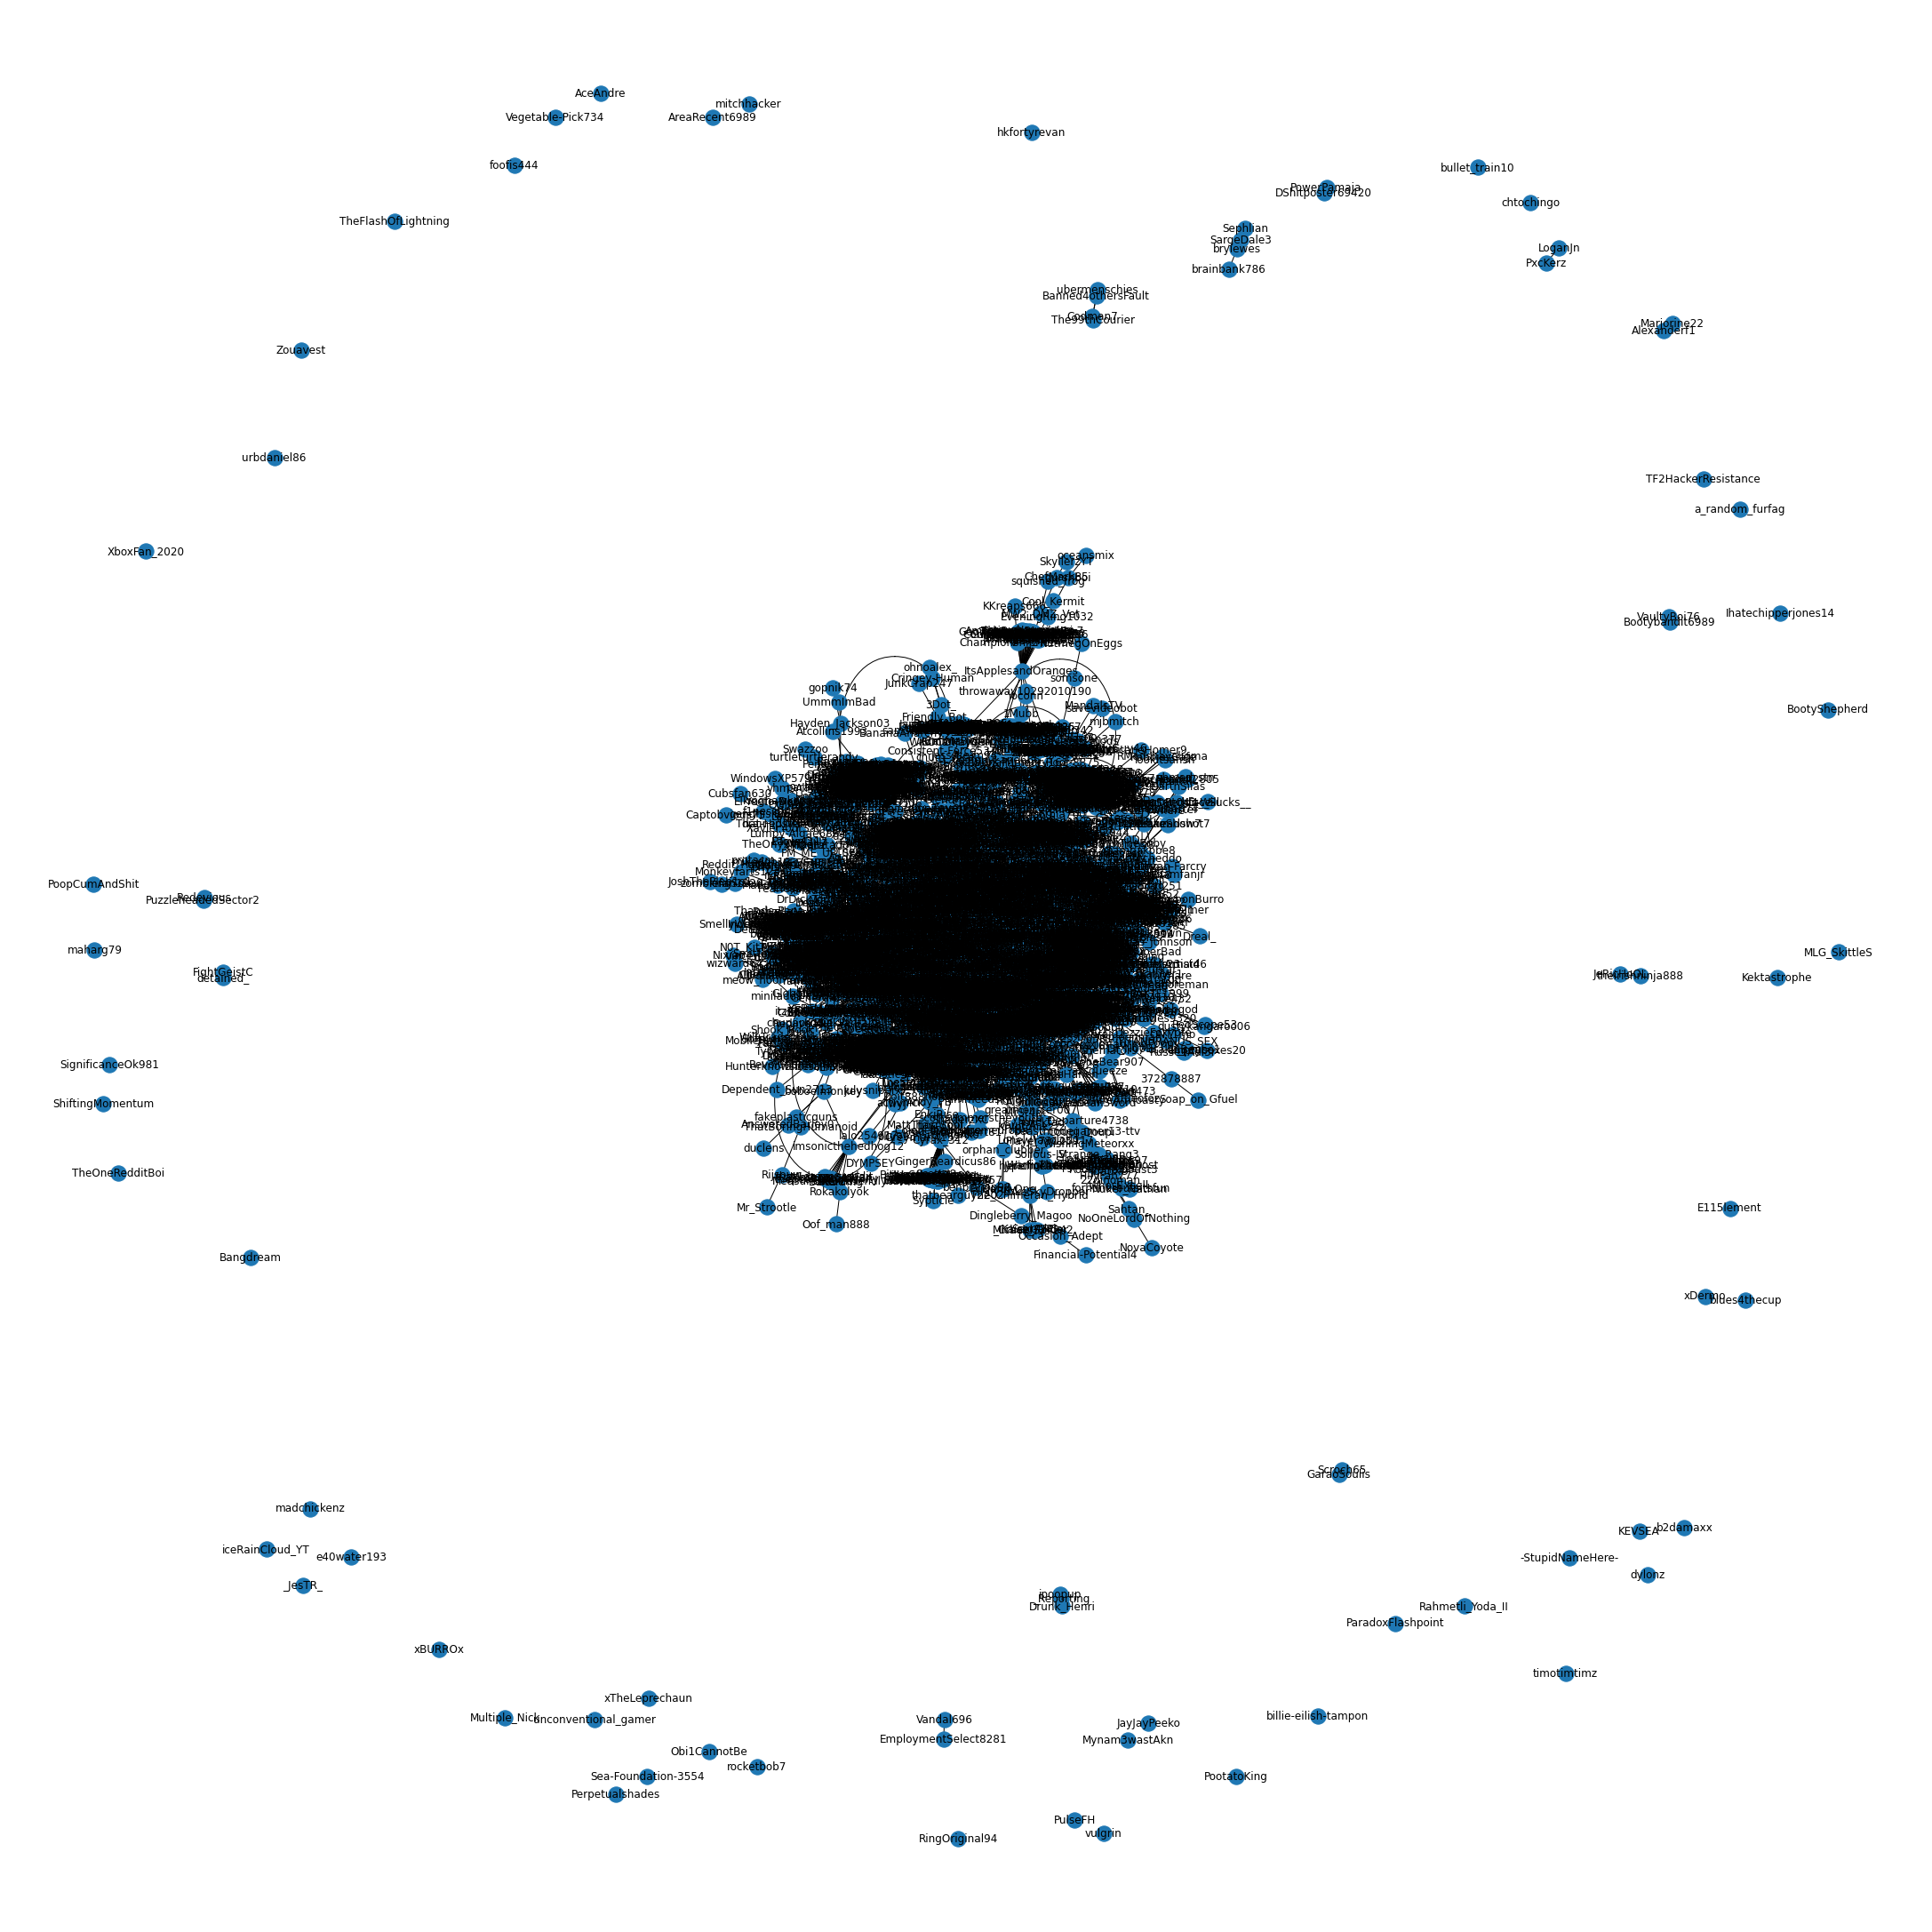

In [23]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Reddit_DA_NETWORK.csv")

# Create an undirected graph object
G = nx.Graph()

# Add nodes for each unique user in the data
for i, row in df.iterrows():
    G.add_node(row['post_redditor'])
    G.add_node(row['comment_author'])

# Add edges between users who are connected, with weights representing the number of interactions
for i, row in df.iterrows():
    if row['depth'] == 0:
        # Comment author replied to post
        if G.has_edge(row['post_redditor'], row['comment_author']):
            # Increase the weight of the edge by 1
            G[row['post_redditor']][row['comment_author']]['weight'] += 1
        else:
            # Add a new edge with weight 1
            G.add_edge(row['post_redditor'], row['comment_author'], weight=1)
    else:
        # Comment author replied to another comment
        parent_comment = df.loc[df['comment_id'] == row['parent_id']]
        if not parent_comment.empty:
            if G.has_edge(parent_comment.iloc[0]['comment_author'], row['comment_author']):
                # Increase the weight of the edge by 1
                G[parent_comment.iloc[0]['comment_author']][row['comment_author']]['weight'] += 1
            else:
                # Add a new edge with weight 1
                G.add_edge(parent_comment.iloc[0]['comment_author'], row['comment_author'], weight=1)

# Create a figure with a specific size (in inches)
plt.figure(figsize=(30, 30))

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()


In [31]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Reddit_DA_NETWORK.csv")

# Create an undirected graph object
G = nx.Graph()

# Add nodes for each unique user in the data
for i, row in df.iterrows():
    G.add_node(row['post_redditor'])
    G.add_node(row['comment_author'])

# Add edges between users who are connected, with weights representing the number of interactions
for i, row in df.iterrows():
    if row['depth'] == 0:
        # Comment author replied to post
        if G.has_edge(row['post_redditor'], row['comment_author']):
            # Increase the weight of the edge by 1
            G[row['post_redditor']][row['comment_author']]['weight'] += 1
        else:
            # Add a new edge with weight 1
            G.add_edge(row['post_redditor'], row['comment_author'], weight=1)
    else:
        # Comment author replied to another comment
        parent_comment = df.loc[df['comment_id'] == row['parent_id']]
        if not parent_comment.empty:
            if G.has_edge(parent_comment.iloc[0]['comment_author'], row['comment_author']):
                # Increase the weight of the edge by 1
                G[parent_comment.iloc[0]['comment_author']][row['comment_author']]['weight'] += 1
            else:
                # Add a new edge with weight 1
                G.add_edge(parent_comment.iloc[0]['comment_author'], row['comment_author'], weight=1)

# Remove isolated nodes (nodes that are not connected to any other nodes)
G.remove_nodes_from(list(nx.isolates(G)))


# Extract edges and their weights and write them to a CSV file
edges_data = pd.DataFrame(list(G.edges(data=True)), columns=['source', 'target', 'attr_dict'])
edges_data['weight'] = edges_data['attr_dict'].map(lambda x: x.get('weight', 1))
edges_data.drop('attr_dict', axis=1, inplace=True)
edges_data.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\edges_data.csv", index=False)


In [40]:
import pandas as pd

# Load the data from the csv files
reddit = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Reddit_DA_NETWORK.csv")
post_user = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Post_user_sentiment.csv")
edge = pd.read_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\edges_data.csv")

# Create a dictionary to map comment_author and User to their respective sentiment scores
sentiment_dict = pd.concat([reddit[['comment_author', 'comment_sentiment']], post_user[['User', 'Rec_Comm_sentiment_score']].rename(columns={'User': 'comment_author', 'Rec_Comm_sentiment_score': 'comment_sentiment'})]).set_index('comment_author')['comment_sentiment'].to_dict()

# Add the Source_Sentiment_score and Target_Sentiment_score columns to the edge DataFrame
edge['SC_Source'] = edge['source'].map(sentiment_dict)
edge['SC_Target'] = edge['target'].map(sentiment_dict)

# Save the updated edge DataFrame to a new csv file
edge.to_csv(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\edges_data_more.csv", index=False)


In [42]:
import pandas as pd

# Load the data from the excel file
edge = pd.read_excel(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Edges_Gephi.xlsx")

# Add the new column to the edge DataFrame
edge['Source_Senti'] = edge['SC_Source'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
edge['Target_Senti'] = edge['SC_Target'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Save the updated edge DataFrame to the same excel file
edge.to_excel(r"C:\Users\Pranav SA\Desktop\DABI PROJ SEM3\Reddit Data\Reddit FETCH\FINAL 2022\DATA FOR NETWORK\Edges_Gephi.xlsx", index=False)
